# Challenge 4 - Pytorch and Neural Networks

Welcome to challenge #4! For this week's challenge, you will only have the coding section and no MCQ section.

**Total Points:** 9  
**Instructions:**  
Complete each function below as specified.

**Grading Breakdown:**  
- `create_random_tensor`: 1 point  
- `move_tensor_to_device`: 1 point  
- `build_LeNet5`: 3 points  
- Answers based on dataset loading and training loop: 4 points

## Important Note on Environment:
This challenge will <span style="color: red">not work properly on Codespaces</span> because of the lack of GPU and pytorch support (at least I haven't figured out the setup yet). So for this challenge, you will open your repository's notebook in Google Collab and continue. You can do so by clicking the "Open in Collab" badge below.

<a href="https://colab.research.google.com/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

After completing the code part, please make sure to run the TESTING section of this notebook for the test cases. Again, the pytest on Github will fail. I shall manually enter your grades without the help of the autograder for this challenge referring to the test section at the end.

## Imports and setup

In [2]:
# Common imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

## Task 1: Create a random tensor (1 point)

In the given function below, fill in code to create a random tensor in the shape specified by the passed parameter.

In [3]:
def create_random_tensor(shape: tuple) -> torch.Tensor:
    """
    Create and return a random tensor with the given shape using torch.rand.

    Parameters:
        shape (tuple): The shape of the tensor to create.

    Returns:
        torch.Tensor: A random tensor of the specified shape.
    """

    return torch.rand(shape)

## Task 2: Move tensor to avaliable device (1 point)

Create a method that finds out if the hardware supports running on a CUDA device (gpu) or CPU. Then move the input tensor into the memory of that device.

In [4]:
def move_tensor_to_device(tensor: torch.Tensor) -> torch.Tensor:
    """
    Move the given tensor to the an available device i.e, CUDA (gpu) if available else CPU.

    Parameters:
        tensor (torch.Tensor): The tensor to move.

    Returns:
        torch.Tensor: The tensor on the specified device.
    """
    # TODO: Find if CUDA is available and move tensor to the device.
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    return tensor.to(device)     # return the tensor on the device memory.


## Task 3: Build the LeNet-5 CNN model (3 points)

Build Yann LeCun's original LeNet model by extending Pytorch's nn.Module class. While there are many variations of the original, the below architecture is what was used in the [actual paper](https://ieeexplore.ieee.org/document/726791). The one implemented last week in the exercise notebook was a variation with updated functions such as maxpool instead of averagepool and relu instead of sigmoid because these perform better. Also note the use of padding in the first convolution layer.  
  
For the purposes of this task, make sure you adhere to the below architecture and recreate it.

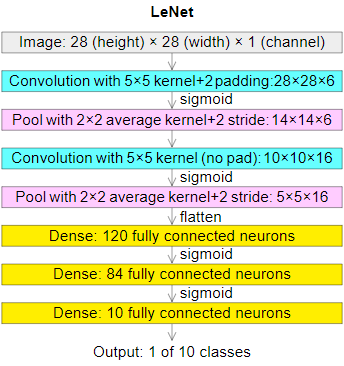

In [49]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, padding=2)
        self.sigmoid = nn.Sigmoid()
        self.avgpool1 = nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.avgpool2 = nn.AvgPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.sigmoid(self.conv1(x))
        x = self.avgpool1(x)

        x = self.sigmoid(self.conv2(x))
        x = self.avgpool2(x)

        x = self.flatten(x)

        x = self.sigmoid(self.fc1(x))

        x = self.sigmoid(self.fc2(x))

        x = self.fc3(x)

        return x


def build_LeNet5() -> nn.Module:
    """
    Build and return the LeNet-5 CNN model.

    The network should include:
      - 2 convolutional layers with Sigmoid activation.
        - 1st layer has a padding of 2 while the 2nd has no padding.
        - kernel size is 5.
      - 2 maxaverage pooling layers with stride of 2
        - Hint: maxpool function from practice exercise also had a stride of 2.
        - Recall what stride means in terms of pooling).
      - A flattening operation (using view() OR torch.Flatten()).
      - A fully connected layer that outputs logits for num_classes.
        - Logits: raw, unnormalised scores used to compute probabilities for each class a.k.a. the output of the network.

    Returns:
        nn.Module: The custom CNN model.
    """

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = LeNet5().to(device)
    summary(model, (1, 28, 28)) # Print the model summary, input size (1, 28, 28) for MNIST dataset.
    return model, device


## Task 4: Training the model on fashion MNIST

We are now going to go through the process of loading data into pytorch's dataloaders to be used for training by the above defined model. The dataloading, visualisation and train loop code is provided. Based on each code cell and its output, answer the question(s) that follow in the designated markdown cells. You can refer to documentation/external resources to understand and answer the questions.

In [50]:
# Defining the transform to passed when loading data
transform = transforms.Compose([transforms.Resize((28, 28)),
                               transforms.ToTensor(),
                               transforms.Normalize(mean=0.2859, std=0.3530)
                               ])

# Loading the Fashion-MNIST dataset
fMnist_train = datasets.FashionMNIST('./datasets/', download=True, train=True, transform=transform)
fMnist_test = datasets.FashionMNIST('./datasets/', download=True, train=False, transform=transform)

### Explain the 3 different transforms used above. (1 point)

### <font color='red'>transforms.Resize((28, 28)): Resizes all images to a uniform 28x28 size for the neural network.

transforms.ToTensor(): Converts PIL Images to PyTorch tensors, the format required by the model.

transforms.Normalize(mean=0.2859, std=0.3530): Normalizes pixel values to improve training efficiency and performance.</font>

Creating and loading the train and test datasets into the data loaders. A quick visualisation of sample images is also displayed.

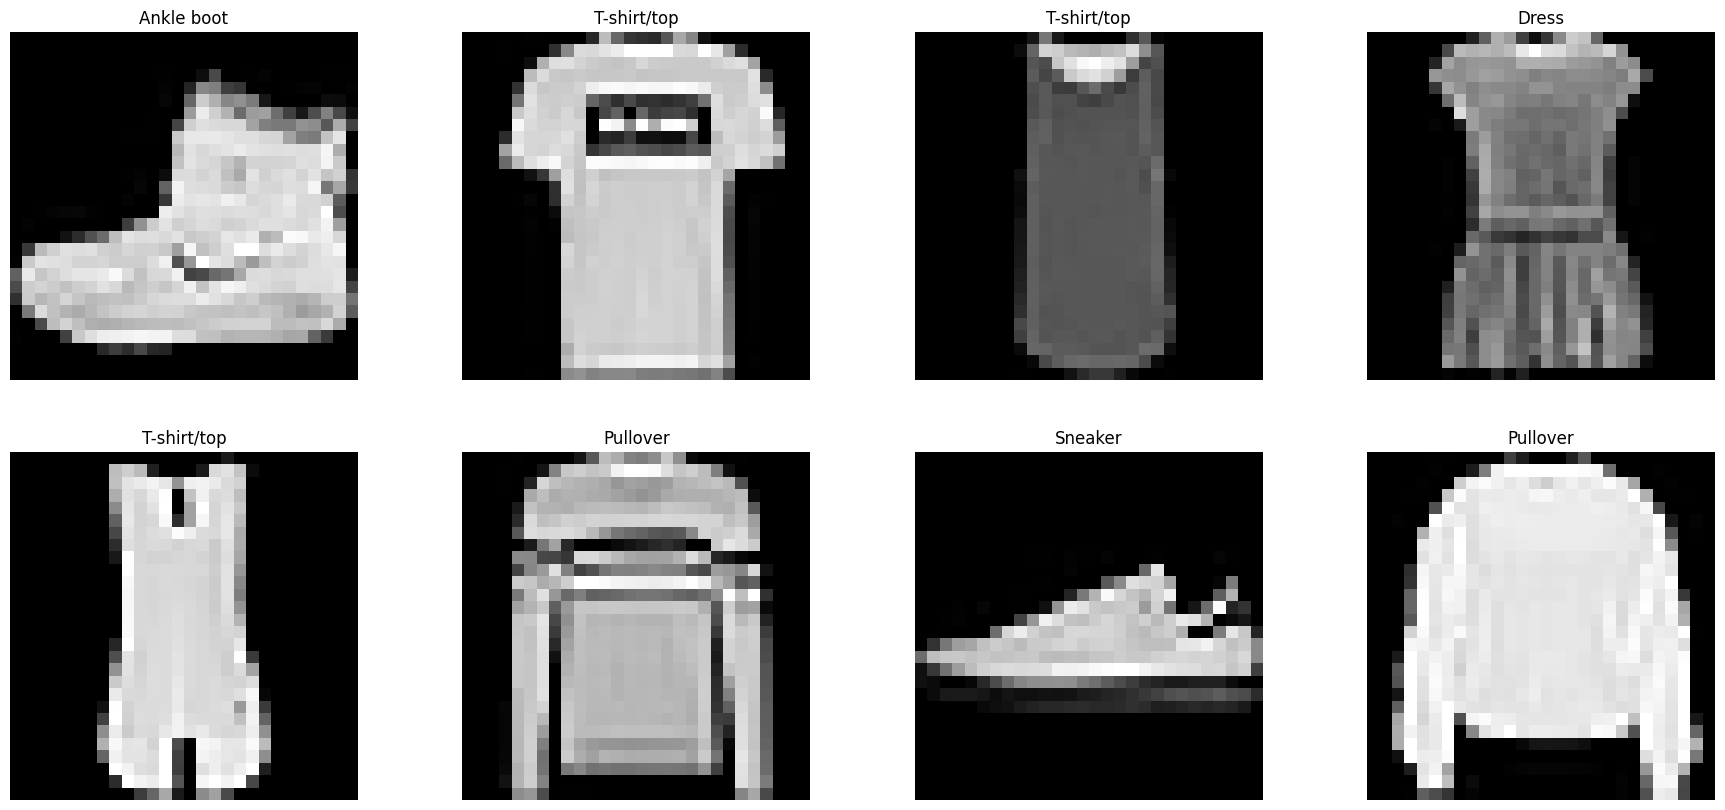

In [51]:
# Creating DataLoaders
train_dataloader = torch.utils.data.DataLoader(fMnist_train, batch_size=64, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(fMnist_test, batch_size=64, shuffle=True)

# Displaying a few examples of he dataset to ensure they have been loaded correctly.
fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()
text_labels = {v: k for k, v in fMnist_train.class_to_idx.items()}
for i in range(8):
    ax[i].imshow(fMnist_train[i][0].reshape((28, 28)), cmap='gray')
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(text_labels[fMnist_train[i][1]])

plt.show()

### Defining the training loop with the train and test functions.
This is an example of a typical training loop with pytorch. The code in the below cell only has the code for the forward training pass. In the hidden cell below that you will find the full code for the training loop and the test (evaluation) function. Do not worry too much about all the code right now.

In [52]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()           # <--- What does this do?

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()

        # Compute prediction error
        pred = model(X)                 # <--- What does this do?
        loss = loss_fn(pred, y)         # <--- What does this do?

        # This is the backprop set up. Explain what each of the steps do
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

#### Expand to reveal training loop code (not required for graded questions)

In [53]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    loss, accuracy = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            loss += loss_fn(pred, y).item()
            accuracy += (pred.argmax(1) == y).type(torch.float).sum().item()
    loss /= num_batches
    accuracy /= size

    return loss, accuracy

def train_loop(train_dataloader, test_dataloader, model, loss_fn, optimizer, epochs):
    train_loss = []
    train_accuracy = []
    test_loss = []
    test_accuracy = []

    # Iterate over each epoch
    for t in range(epochs):
        print(f"Epoch {t+1}:\n")
        train(train_dataloader, model, loss_fn, optimizer)

        # Get the overall loss and accuracy for both train and test datasets
        tr_loss, tr_acc = test(train_dataloader, model, loss_fn)
        ts_loss, ts_acc = test(test_dataloader, model, loss_fn)

        print(f"Train Error: \n Accuracy: {(100*tr_acc):>0.1f}%, Avg loss: {tr_loss:>8f} \n")
        print(f"Test Error: \n Accuracy: {(100*ts_acc):>0.1f}%, Avg loss: {ts_loss:>8f} \n")

        # Store and return the losses and accuracies. We can graph these later
        train_loss = train_loss + [tr_loss]
        train_accuracy = train_accuracy + [tr_acc]
        test_loss = test_loss + [ts_loss]
        test_accuracy = test_accuracy + [ts_acc]

    print("Done training!")
    return train_loss, train_accuracy, test_loss, test_accuracy

### What are the following functions mentioned in the above train() function used for? (3 points)

1. model.train()

<font color='red'>Activates training mode in the model, enabling behaviors specific to the training process.</font>

2. pred = model(X)

<font color='red'>Obtains the model's predictions (pred) by feeding input data (X) through it.</font>

3. loss = loss_fn(pred, y)

<font color='red'>Calculates the difference between predictions (pred) and actual targets (y) using a loss function (loss_fn). This difference guides model improvement.</font>

### Defining a loss function and optimiser
The loss_fn passed to the training loop is defined below. Here we are using [CrossEntropyLoss](https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e) and the [Adam optimiser](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).

In [54]:
model, device = build_LeNet5() # Getting the LeNet5 model

# Define the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
           Sigmoid-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
           Sigmoid-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
           Flatten-7                  [-1, 400]               0
            Linear-8                  [-1, 120]          48,120
           Sigmoid-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
          Sigmoid-11                   [-1, 84]               0
           Linear-12                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
---------------------------------

Let's train the model!

In [55]:
epochs = 5 # Only running for 5 epochs for the sake of time
train_loss, train_accuracy, test_loss, test_accuracy = train_loop(train_dataloader, test_dataloader, model, loss_fn, optimizer, epochs)

Epoch 1:

loss: 2.316441  [   64/60000]
loss: 1.964579  [ 6464/60000]
loss: 1.205578  [12864/60000]
loss: 1.191329  [19264/60000]
loss: 0.805967  [25664/60000]
loss: 0.857625  [32064/60000]
loss: 0.786336  [38464/60000]
loss: 0.801575  [44864/60000]
loss: 0.837019  [51264/60000]
loss: 0.660410  [57664/60000]
Train Error: 
 Accuracy: 74.7%, Avg loss: 0.659795 

Test Error: 
 Accuracy: 74.0%, Avg loss: 0.681276 

Done training!


## Evaluating the model's performance
Let's plot losses and accuracies of the model over the 5 epochs. The plotting util function is already provided below.

In [56]:
'''
Description:
Utility function to plot line plots in a single graph

Params:
dataDict: List - A list of tuples containing the data to be plotted and corresponding plot params as a dictionary (optional).
           Expected key names in paramDict:
           -> label: str - String label to be given to the plot.
                           Only necessary if the 'legend' function param is set to True (False by default).
           -> ha: str - Specifies the horizontal alignment ('left', 'right' or 'center') of text above each point in the plot.
           -> fontsize: int - Sets the font size of text displayed above each point in the plot.
           -> marker: str - Sets the style of marker to be displayed for each data point on the plot. Set to 'o' by default.
           -> decimalPlaces: int - Sets the number of decimal places to display for each data point.
           -> displayPercent: bool - Boolean to decide whether to display numbers in percentage format.
           -> displayOffset: float - positive or negative float value that determines the display offset of text above data point.
title: str - [optional] Title to be set for the graph.
xlabel: str - [optional] Label for the x-axis to be set for the graph.
ylabel: str - [optional] Label for the y-axis to be set for the graph.
figSize: Tuple - [optional] Sets a custom figure size for the plot based on the width and height values passed as a tuple pair.
legend: bool - [optional] Boolean to decide whether to show the legend or not. Set to False by default
'''
def plotMetrics(dataList, X, title='', xlabel='', ylabel='', figSize=None, legend=False):
    if figSize:
            plt.figure(figsize=(figSize))
    for data in dataList:
        y, paramDict = data
        # Getting plot params
        label = paramDict['label'] if 'label' in paramDict else ''
        marker = paramDict['marker'] if 'marker' in paramDict else 'o'
        ha = paramDict['ha'] if 'ha' in paramDict else 'center'
        fontSize = paramDict['fontSize'] if 'fontSize' in paramDict else 8
        decimalPlaces = paramDict['decimalPlaces'] if 'decimalPlaces' in paramDict else 2
        displayPercent = paramDict['displayPercent'] if 'displayPercent' in paramDict else False
        displayOffset = paramDict['displayOffset'] if 'displayOffset' in paramDict else 0.005

        plt.plot(X, y, label=label, marker=marker)

        # Getting the data values to show on the plotted points along the line
        for i, v in enumerate(y):
            percentMultiplier = 100 if displayPercent else 1
            v_str = f'{v * percentMultiplier:.{decimalPlaces}f}{"%" if displayPercent else ""}'
            plt.text(i + 1, v + displayOffset, v_str, ha=ha, fontsize=fontSize)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if legend:
        plt.legend()
    plt.show()

Plotting losses

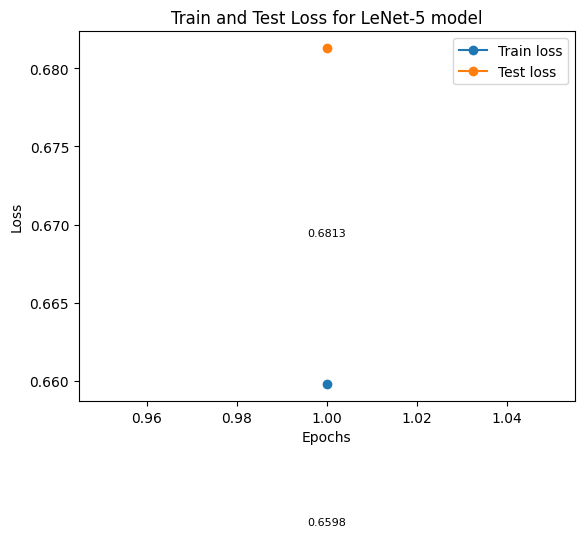

In [57]:
epochRange = range(1, epochs+1)
# Defining data and plot params
lossDataList = [(train_loss, {'label': 'Train loss', 'decimalPlaces': 4, 'displayOffset': -0.009}),
                (test_loss, {'label': 'Test loss', 'decimalPlaces': 4, 'displayOffset': -0.012})]
plotTitle = 'Train and Test Loss for LeNet-5 model'

# Calling my custom util function to plot loss data
plotMetrics(lossDataList, epochRange, xlabel='Epochs', ylabel='Loss', title=plotTitle, legend=True)

Plotting accuracies

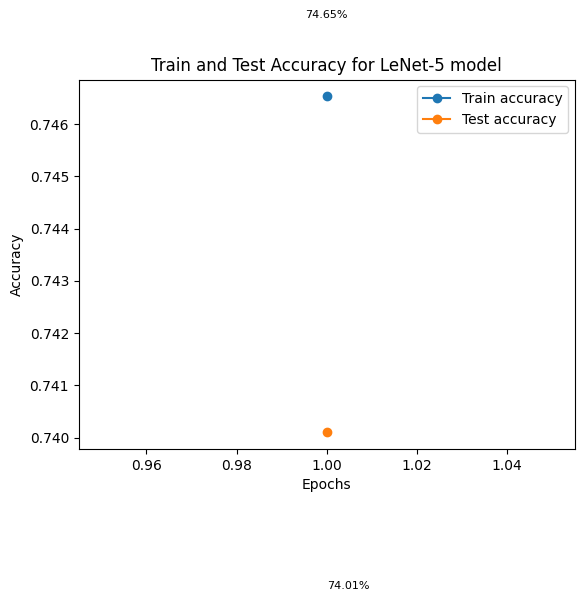

In [58]:
# Defining data and plot params
epochRange = range(1, epochs+1)
accuracyDataList = [(train_accuracy, {'label': 'Train accuracy', 'displayOffset': 0.0015,
                                      'decimalPlaces': 2, 'displayPercent': True}),
                (test_accuracy, {'label': 'Test accuracy', 'ha': 'left', 'displayOffset': -0.003,
                                 'decimalPlaces': 2, 'displayPercent': True})]
plotTitle = 'Train and Test Accuracy for LeNet-5 model'

# Calling my custom util function to plot accuracy data
plotMetrics(accuracyDataList, epochRange, xlabel='Epochs', ylabel='Accuracy', title=plotTitle, legend=True)

---

# Testing

<span style="color:red">Please run the below code cells after completing your above tasks.</span>  
If you see any assertion error outputs when running the cells, then you will know that you have mistakes in your code i.e., the test case has failed.

In [59]:
import pytest

In [60]:
def test_create_random_tensor():
    """
    Test that create_random_tensor returns a torch.Tensor with the expected shape and value range.
    """
    shape = (2, 3, 4)
    tensor = create_random_tensor(shape)
    assert isinstance(tensor, torch.Tensor), "Output is not a torch.Tensor."
    assert tensor.shape == shape, f"Expected shape {shape}, got {tensor.shape}."
    # Verify that the values are in the range [0, 1]
    assert torch.all(tensor >= 0) and torch.all(tensor <= 1), "Tensor values should be in range [0, 1]."

In [61]:
def test_move_tensor_to_device():
    """
    Test that move_tensor_to_device correctly moves a tensor to the requested device.
    """
    sample_tensor = torch.tensor([1, 2, 3])
    # Use an available device: 'cuda' if available, else 'cpu'
    available_device = "cuda" if torch.cuda.is_available() else "cpu"
    moved_tensor = move_tensor_to_device(sample_tensor)
    assert moved_tensor.device.type == available_device, (
        f"Expected tensor on device '{available_device}', but got '{moved_tensor.device.type}'."
    )

In [62]:
def test_build_LeNet5():
    """
    Test that build_LeNet5 returns a LeNet-5 model.
    The test checks for:
      - The model is an instance of nn.Module.
      - Presence of at least one average pooling layer (nn.AvgPool2d).
      - Presence of at least one Sigmoid activation (nn.Sigmoid).
      - The first convolutional layer has 1 input channel, 6 output channels, and kernel size 5x5.
    """
    model, device = build_LeNet5()
    # Check that the model is an instance of torch.nn.Module.
    assert isinstance(model, torch.nn.Module), "Returned model is not an instance of torch.nn.Module."

    # Check for at least one average pooling layer.
    has_avgpool = any(isinstance(m, torch.nn.AvgPool2d) for m in model.modules())
    assert has_avgpool, "Model does not contain an Average Pooling layer (nn.AvgPool2d)."

    # Check for at least one Sigmoid activation layer.
    has_sigmoid = any(isinstance(m, torch.nn.Sigmoid) for m in model.modules())
    assert has_sigmoid, "Model does not contain a Sigmoid activation layer (nn.Sigmoid)."

    # Check for convolutional layers and inspect the first one.
    conv_layers = [m for m in model.modules() if isinstance(m, torch.nn.Conv2d)]
    assert len(conv_layers) >= 2, "Model should have at least two convolutional layers."

    first_conv = conv_layers[0]
    assert first_conv.in_channels == 1, f"First Conv2d layer expected 1 input channel, got {first_conv.in_channels}."
    assert first_conv.out_channels == 6, f"First Conv2d layer expected 6 output channels, got {first_conv.out_channels}."
    assert first_conv.kernel_size == (5, 5), f"First Conv2d layer kernel_size expected (5, 5), got {first_conv.kernel_size}."

In [63]:
test_create_random_tensor()
test_move_tensor_to_device()
test_build_LeNet5()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
           Sigmoid-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
           Sigmoid-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
           Flatten-7                  [-1, 400]               0
            Linear-8                  [-1, 120]          48,120
           Sigmoid-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
          Sigmoid-11                   [-1, 84]               0
           Linear-12                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
---------------------------------